In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
!rm -rf data && mkdir data && curl -o data/dummy_data.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson10/notebooks/data/dummy_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1513  100  1513    0     0   5043      0 --:--:-- --:--:-- --:--:--     0


<bound method NDFrame.head of            x         y
0   1.658985  4.285136
1  -3.453687  3.424321
2   4.838138  1.151539
3  -5.379713 -3.362104
4   0.972564  2.924086
..       ...       ...
75 -2.793241 -2.149706
76  2.884105  3.043438
77 -2.967647  2.848696
78  4.479332 -1.764772
79 -4.905566 -2.911070

[80 rows x 2 columns]>


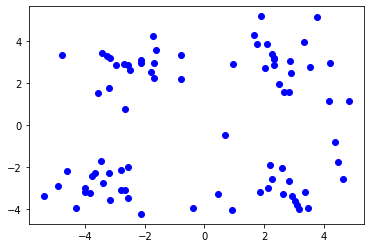

In [ ]:
df = pd.read_csv("data/dummy_data.csv")
print(df.head)

x = df.to_numpy()
plt.scatter(x[:,0], x[:,1], color='b')
plt.show()

In [ ]:
x.shape


(80, 2)

In [ ]:
class KMeans():
  def __init__(self, n_clusters, data):
    self.k = n_clusters
    self.x = data
    self.d = self.x[0].shape[0] # Dimension
    self.centroids = np.zeros((self.d,self.k))
    
    # Initializing K centroids within the data bounds
    # Respecting the diffirent max and min of the X and Y axis
    for i in range(0, self.d):
        self.centroids[i] = np.random.uniform(low=np.min(self.x[:, i]), high=np.max(self.x[:, i]), size=(1, self.k))
    self.centroids = np.transpose(self.centroids)

    self.labels = self.genLabels()
    
    self.colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'purple', 5:'orange', 6:'brown'}
    
  def dist(self, p, q):
    # Euclidian distance
    return math.sqrt(np.sum(np.power(np.subtract(p, q), 2)))

  def predict(self, p):
    return np.argmin([self.dist(p, centroid) for centroid in self.centroids])

  def genLabels(self):
    return np.asarray([self.predict(p) for p in self.x])

  def fit(self, epochs):
    print(f"\nFitting for {epochs} epochs.")
    for epoch in range(0, epochs):
      for i, centroid in enumerate(self.centroids):
        # import pdb
        # pdb.set_trace()
        # VECTORS!!
        l = [1 if item == i else 0 for item in self.labels]
        temp = np.matmul(x.T, np.transpose(l))
        self.centroids[i] = np.divide(temp.reshape(1,2), sum(l))

        # Regenerate the labels
        self.labels = self.genLabels()

      self.showPlot(classification=True)

    print("Done fitting!\n")
  
  def showPlot(self, classification=False):
    plt.figure(1, figsize = (10,10))
    
    if classification:
      for i, p in enumerate(self.x):
       plt.scatter(p[0], p[1], color=self.colors[self.labels[i]])
      
      for i, centroid in enumerate(self.centroids):
        plt.scatter(centroid[0], centroid[1], color=self.colors[i], s=100, marker="x")

    else:
      plt.scatter(self.x[:,0], self.x[:,1], color='blue')

      plt.scatter(self.centroids[:,0], self.centroids[:,1], color="red", s=100)

    plt.show()
    
  def printCentroids(self):
    print("="*20)
    print("Centroids:")
    print(self.centroids)

In [ ]:
x.shape

(80, 2)

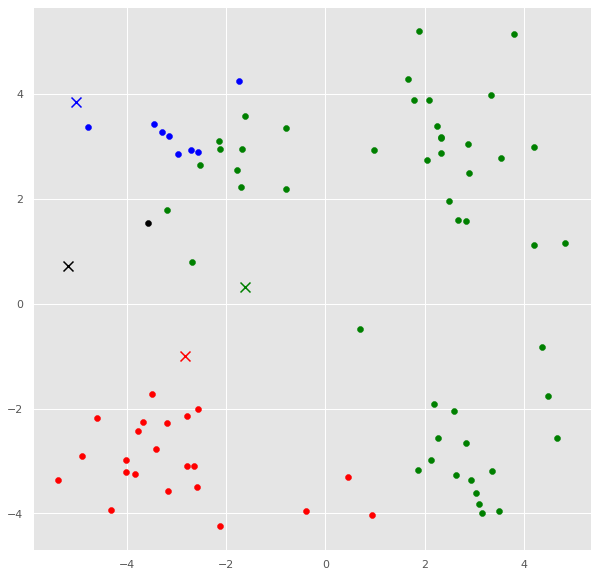

Centroids:
[[-2.82514663 -1.0019447 ]
 [-5.02255386  3.85377838]
 [-1.61002542  0.32138359]
 [-5.19192833  0.71188514]]

Fitting for 10 epochs.


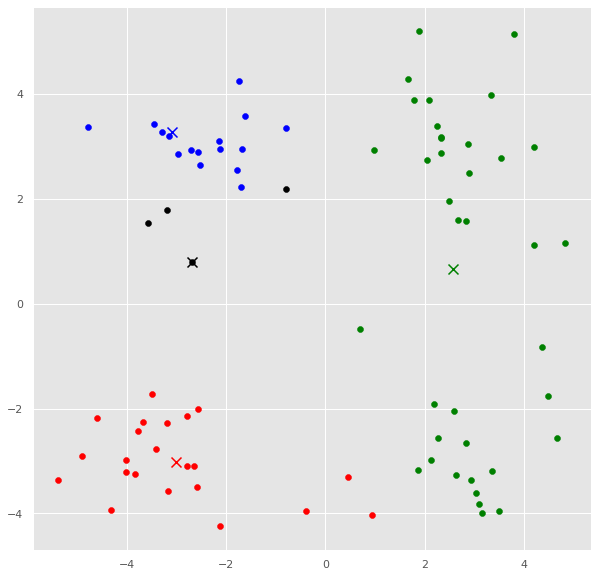

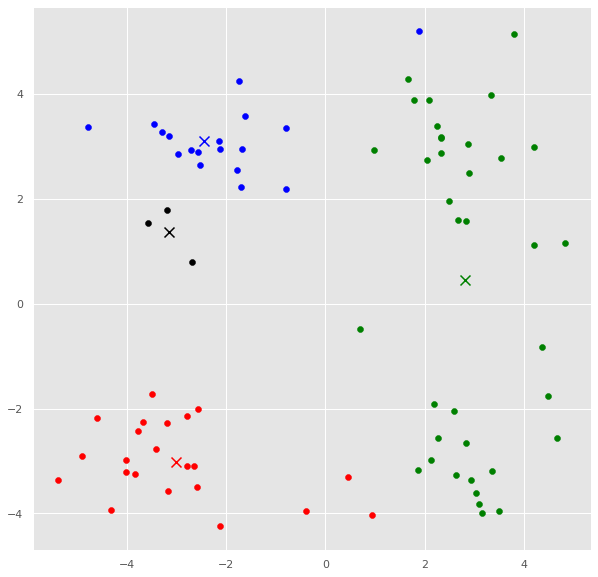

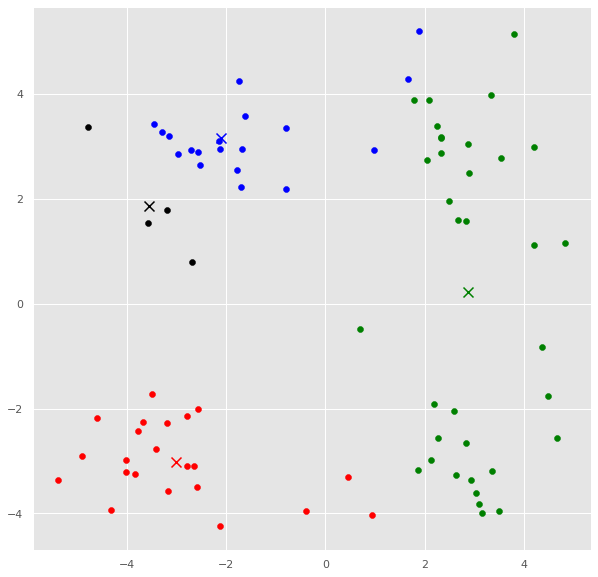

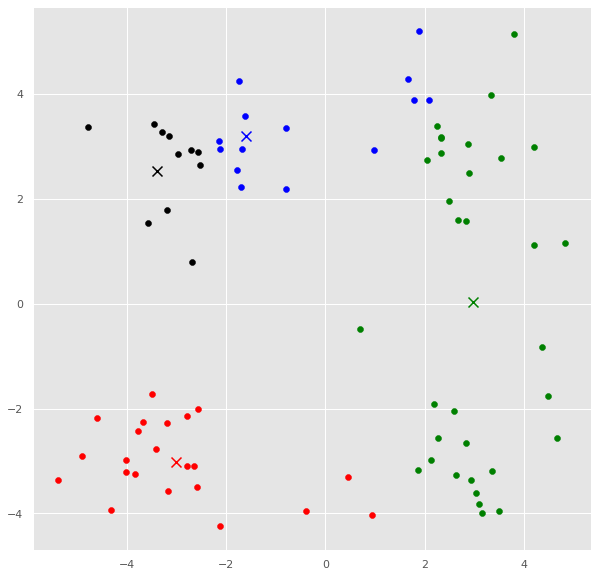

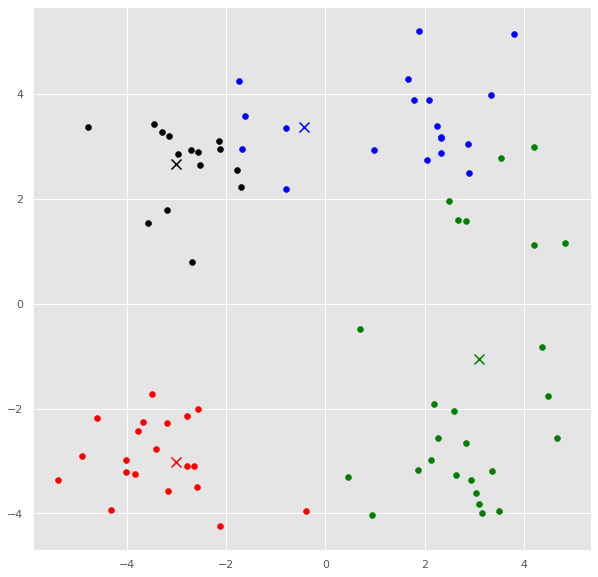

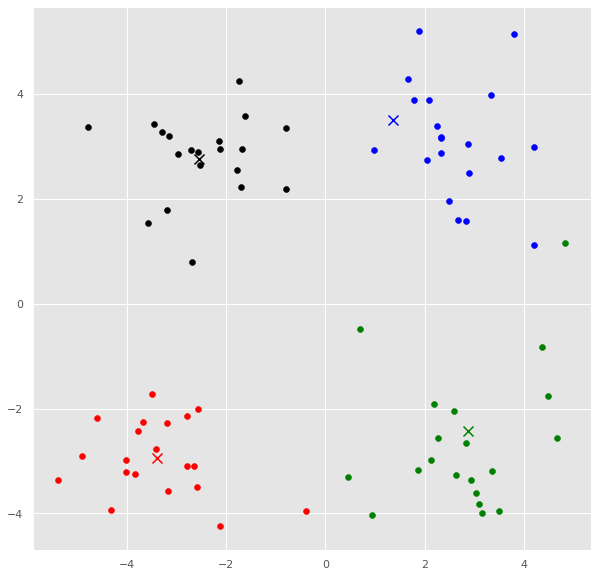

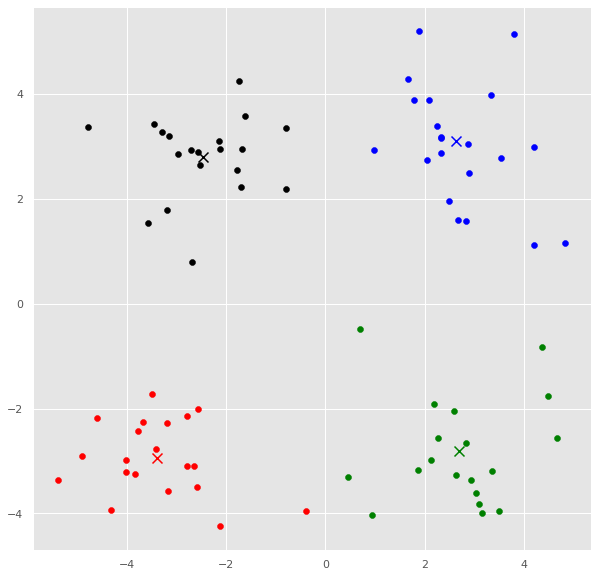

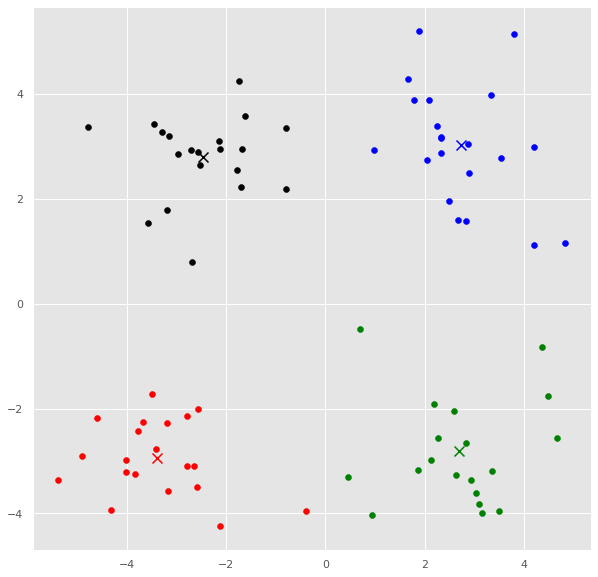

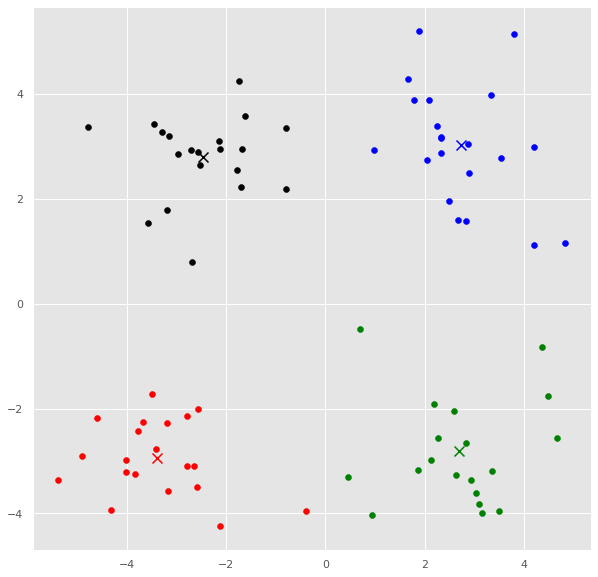

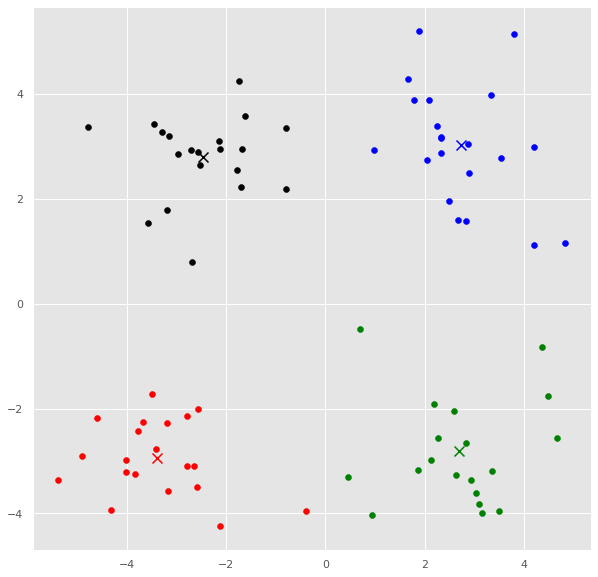

Done fitting!

Centroids:
[[-3.38237045 -2.9473363 ]
 [ 2.73184457  3.01548295]
 [ 2.69581468 -2.81467121]
 [-2.46154315  2.78737555]]


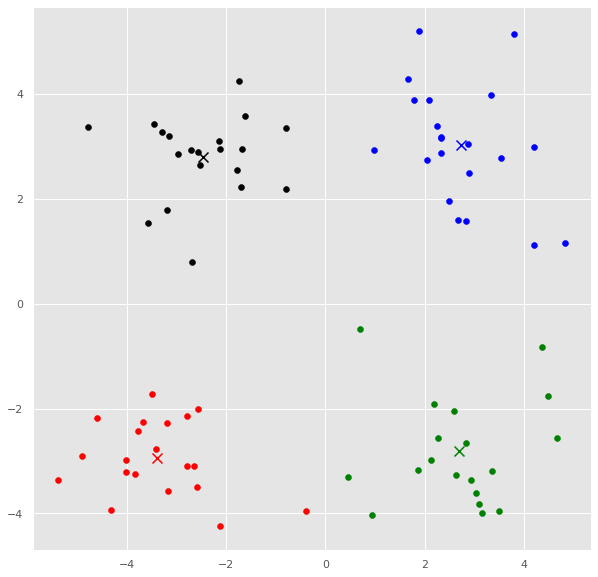

KMean prediction for [-2, 3] is 3 which is black


In [ ]:
kmeans = KMeans(n_clusters=4, data=x)
kmeans.showPlot(classification=True)
kmeans.printCentroids()
kmeans.fit(epochs=10)
kmeans.printCentroids()
kmeans.showPlot(classification=True)
pred = kmeans.predict([-2, 3])
print(f"KMean prediction for [-2, 3] is {pred} which is {kmeans.colors[pred]}")

### Context
În lumea competitivă de astăzi, este esențial să se înțeleagă comportamentul clienților și să se clasifice clienții în funcție de demografie și de comportamentul lor de cumpărare. Acesta este, în linii mari, un aspect al segmentării clienților care le permite comercianților să își adapteze mai bine eforturile de marketing la diverse subgrupuri de public în ceea ce privește strategiile de promovare, marketing și dezvoltare a produselor.

### Obiectiv
Acest tutorial demonstrează conceptul de segmentare a unui set de date de clienți de pe un site de comerț electronic utilizând gruparea k-means în Python. Setul de date conține venitul anual a ~300 de clienți și cheltuielile anuale ale acestora pe un site de comerț electronic. Vom utiliza algoritmii de clusterizare kmeans pentru a obține numărul optim de clustere și pentru a înțelege segmentele de clienți care stau la baza acestora, pe baza datelor furnizate.

### Despre setul de date
Setul de date este format din veniturile anuale si volumul total cheltuit pe un site de comerț electronic pentru o perioadă de un an.  Să explorăm datele utilizând bibliotecile numpy și pandas în python.

In [ ]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
!rm -rf data && mkdir data && curl -o data/customer_income_and_spend.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson10/notebooks/data/customer_income_and_spend.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2429  100  2429    0     0   8963      0 --:--:-- --:--:-- --:--:--  8963


In [ ]:
data = pd.read_csv('data/customer_income_and_spend.csv')
data.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [ ]:
len(data) # of rows

303

In [ ]:
data.describe() #descriptive statistics of the dataset


,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


Setul de date este format din 303 rânduri. Venitul mediu anual este 245K si volumul cheltuit anual este de 149K. Sa analizam distribuția venitului anual și a venitului anual.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income / spend')

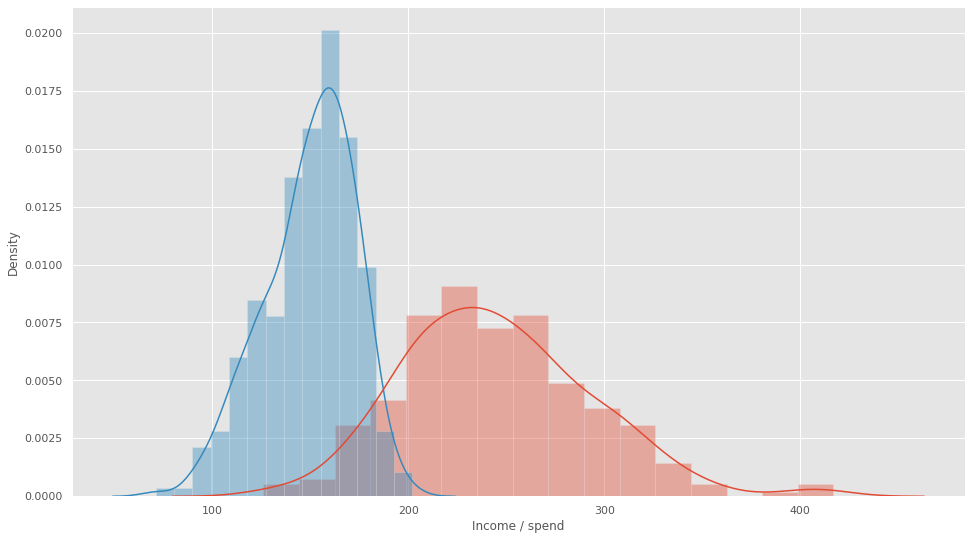

In [ ]:
# Visualising the data
plot_income = sns.distplot(data["INCOME"])
plot_spend = sns.distplot(data["SPEND"])
plt.xlabel('Income / spend')

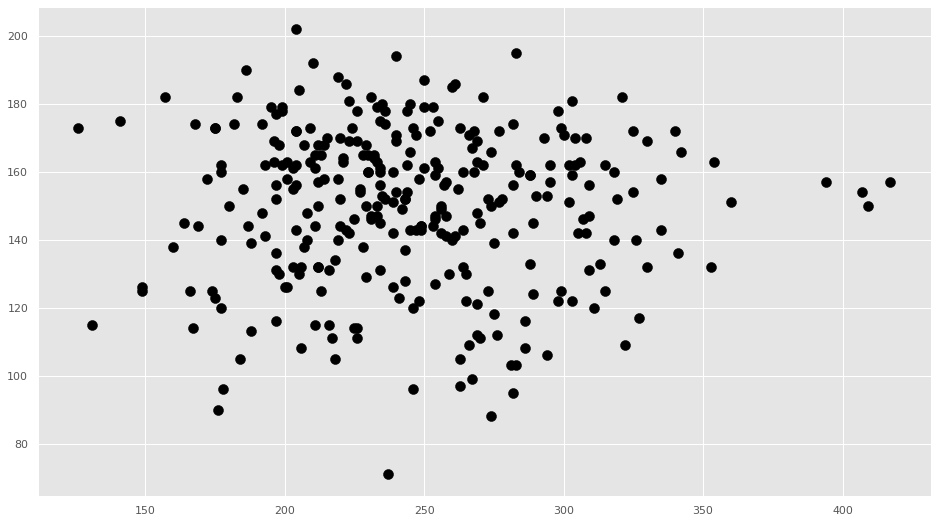

In [ ]:
# Plotting the values to understand the spread
Income = data['INCOME'].values
Spend = data['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

In [ ]:
X = data.iloc[:,[0,1]].values

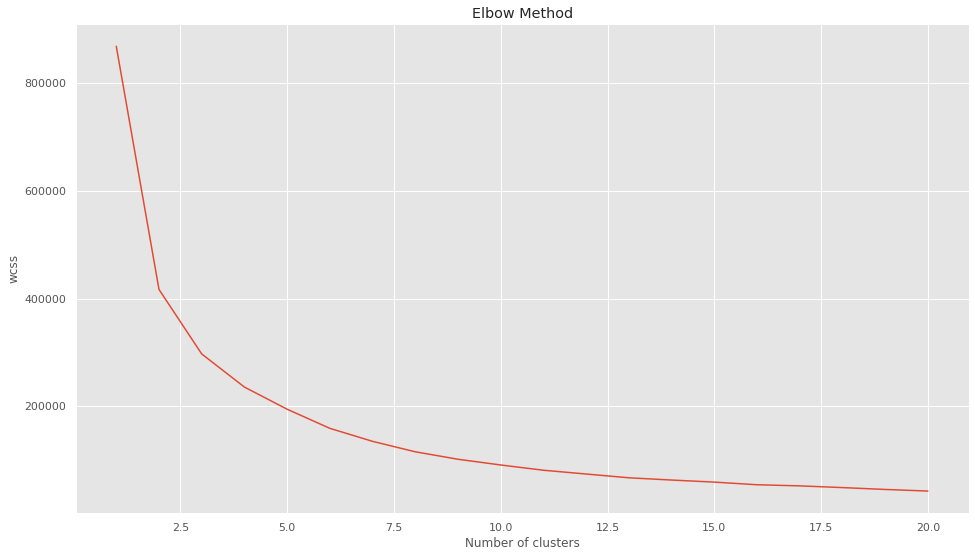

In [ ]:
# Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,21),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
## Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

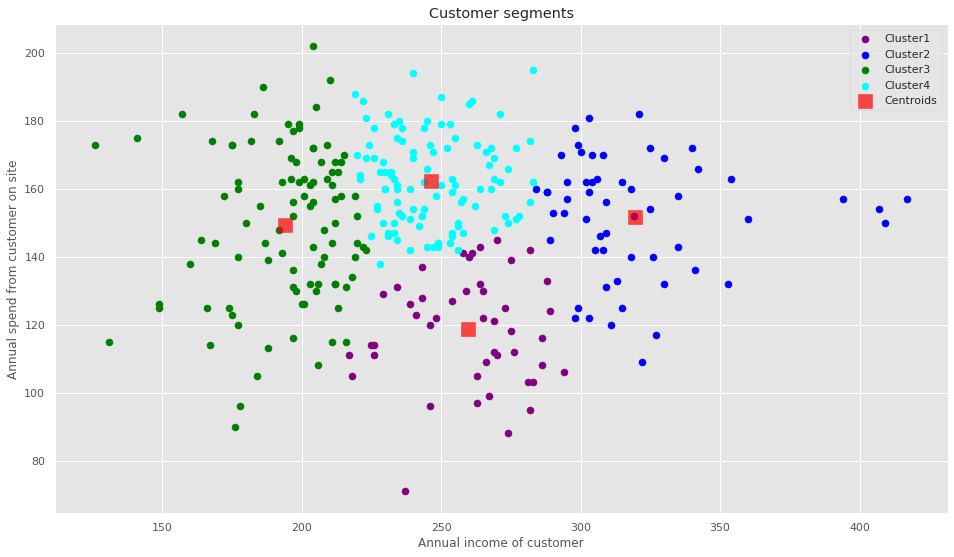

In [ ]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
# plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='cyan',label='Cluster5')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()